In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from prophet import Prophet

In [2]:
day = pd.read_csv('C:\\Users\\trdun\\anaconda3\\envs\\nixtla2\\data\\day_clean.csv')
week = pd.read_csv('C:\\Users\\trdun\\anaconda3\\envs\\nixtla2\\data\\week_clean.csv')
month = pd.read_csv('C:\\Users\\trdun\\anaconda3\\envs\\nixtla2\\data\\month_clean.csv')
hour = pd.read_csv('C:\\Users\\trdun\\anaconda3\\envs\\nixtla2\\data\\hour_clean.csv')

In [26]:
month['ds'] = pd.to_datetime(month['ds'], format = '%Y-%m')

alxm = pd.DataFrame(month, columns=['ds', 'alx'])
alxm.rename(columns={'ds':'ds', 'alx':'y'}, inplace=True)
tr_alxm = alxm[:48]
tst_alxm = alxm[48:]

gcom = pd.DataFrame(month, columns=['ds', 'gco'])
gcom.rename(columns={'ds':'ds', 'gco':'y'}, inplace=True)
tr_gcom = gcom[:48]
tst_gcom = gcom[48:]

mcom = pd.DataFrame(month, columns=['ds', 'mco'])
mcom.rename(columns={'ds':'ds', 'mco':'y'}, inplace=True)
tr_mcom = mcom[:48]
tst_mcom = mcom[48:]

week['ds'] = pd.to_datetime(week['ds'], format = '%Y-%m-%d')

alxw = pd.DataFrame(week, columns=['ds', 'alx'])
alxw.rename(columns={'ds':'ds', 'alx':'y'}, inplace=True)
tr_alxw = alxw[:209]
tst_alxw = alxw[209:]

gcow = pd.DataFrame(week, columns=['ds', 'gco'])
gcow.rename(columns={'ds':'ds', 'gco':'y'}, inplace=True)
tr_gcow = gcow[:209]
tst_gcow = gcow[209:]

mcow = pd.DataFrame(week, columns=['ds', 'mco'])
mcow.rename(columns={'ds':'ds', 'mco':'y'}, inplace=True)
tr_mcow = mcow[:209]
tst_mcow = mcow[209:]

day['ds'] = pd.to_datetime(day['ds'], format = '%Y-%m-%d')

alxd = pd.DataFrame(day, columns=['ds', 'alx'])
alxd.rename(columns={'ds':'ds', 'alx':'y'}, inplace=True)
tr_alxd = alxd[:365]
tst_alxd = alxd[365:]

gcod = pd.DataFrame(day, columns=['ds', 'gco'])
gcod.rename(columns={'ds':'ds', 'gco':'y'}, inplace=True)
tr_gcod = gcod[:365]
tst_gcod = gcod[365:]

mcod = pd.DataFrame(day, columns=['ds', 'mco'])
mcod.rename(columns={'ds':'ds', 'mco':'y'}, inplace=True)
tr_mcod = mcod[:365]
tst_mcod = mcod[365:]

hour['ds'] = pd.to_datetime(hour['ds'], format = '%Y-%m-%d %H:%M')

alxh = pd.DataFrame(hour, columns=['ds', 'alx'])
alxh.rename(columns={'ds':'ds', 'alx':'y'}, inplace=True)
tr_alxh = alxh[:2184]
tst_alxh = alxh[2184:]

gcoh = pd.DataFrame(hour, columns=['ds', 'gco'])
gcoh.rename(columns={'ds':'ds', 'gco':'y'}, inplace=True)
tr_gcoh = gcoh[:2184]
tst_gcoh = gcoh[2184:]

mcoh = pd.DataFrame(hour, columns=['ds', 'mco'])
mcoh.rename(columns={'ds':'ds', 'mco':'y'}, inplace=True)
tr_mcoh = mcoh[:2184]
tst_mcoh = mcoh[2184:]

In [4]:
from permetrics import RegressionMetric
list_metrics = ["MSE","MAE","MedAE","MAPE", "RMSE", "R2", "MASE", "SMAPE"]

18:55:00 - cmdstanpy - INFO - Chain [1] start processing
18:55:00 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


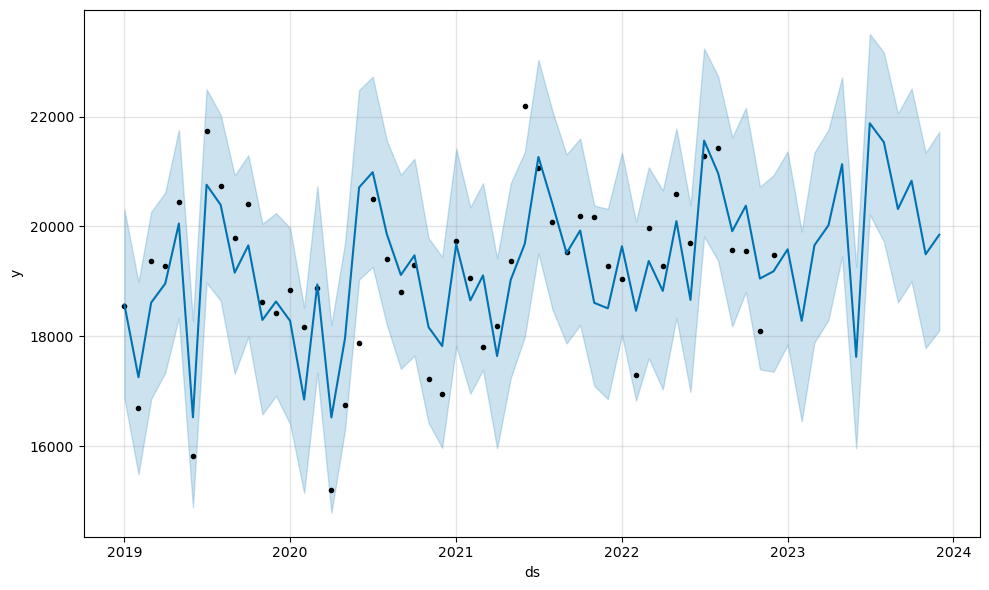

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
55,2023-08-01,19553.116998,19725.815737,23167.544120,19532.089140,19573.638274,1979.290680,1979.290680,1979.290680,1979.290680,1979.290680,1979.290680,0.0,0.0,0.0,21532.407677
56,2023-09-01,19581.756901,18616.722707,22056.869760,19556.193874,19605.793039,734.534708,734.534708,734.534708,734.534708,734.534708,734.534708,0.0,0.0,0.0,20316.291609
57,2023-10-01,19609.472936,18998.860118,22508.890521,19579.078521,19637.468259,1222.449138,1222.449138,1222.449138,1222.449138,1222.449138,1222.449138,0.0,0.0,0.0,20831.922074
58,2023-11-01,19638.112839,17783.734541,21342.325194,19603.587510,19669.684307,-144.956873,-144.956873,-144.956873,-144.956873,-144.956873,-144.956873,0.0,0.0,0.0,19493.155966
59,2023-12-01,19665.828874,18106.609129,21723.457359,19626.899046,19701.480575,182.137661,182.137661,182.137661,182.137661,182.137661,182.137661,0.0,0.0,0.0,19847.966535


In [6]:
alxm_model = Prophet(seasonality_mode = 'additive', interval_width=0.95)
alxm_model.fit(tr_alxm)
alxm_future = alxm_model.make_future_dataframe(periods = 12, freq = 'MS')
alxm_fcst = alxm_model.predict(alxm_future)
fig = alxm_model.plot(alxm_fcst)
plt.show()
alxm_fcst.tail()

In [8]:
alxm_true = tst_alxm['y'].tolist()
alxm_pred = alxm_fcst['yhat'][-12:].tolist()

alxm_eval = RegressionMetric(alxm_true, alxm_pred)
alxm_rlist = []

for metric in list_metrics:
    alxm_rlist.append(alxm_eval.get_metric_by_name(metric))

print(alxm_rlist)

[{'MSE': 3101727.770213548}, {'MAE': 1408.6878230531465}, {'MedAE': 1231.4042810228439}, {'MAPE': 0.06632140728159258}, {'RMSE': 1761.1722715888836}, {'R2': 0.13722220719023803}, {'MASE': 1.056131819355549}, {'SMAPE': 0.03445552121443681}]


19:09:15 - cmdstanpy - INFO - Chain [1] start processing
19:09:16 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


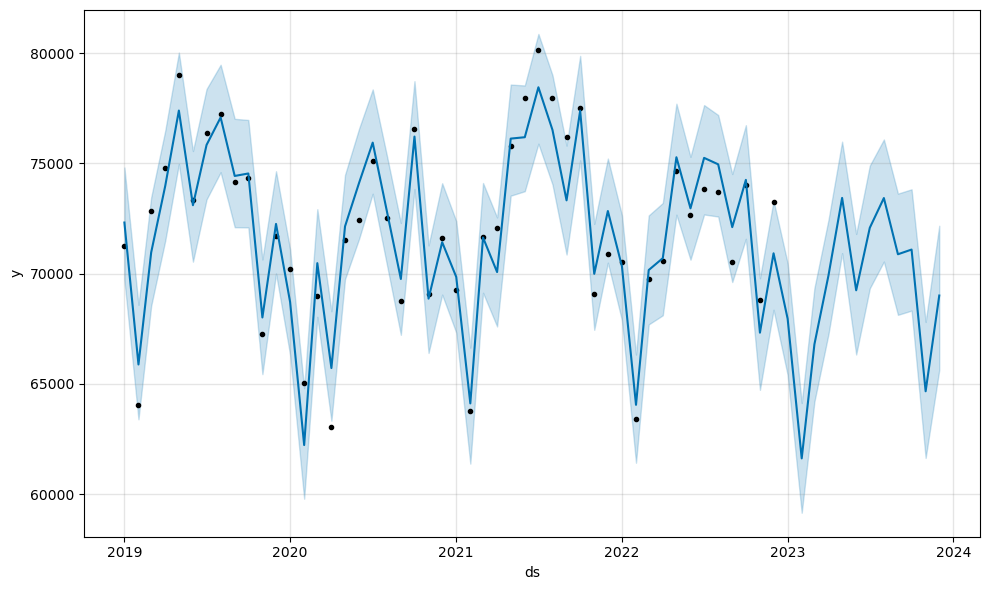

In [9]:
gcom_model = Prophet(seasonality_mode = 'additive', interval_width=0.95)
gcom_model.fit(tr_gcom)
gcom_future = gcom_model.make_future_dataframe(periods = 12, freq = 'MS')
gcom_fcst = gcom_model.predict(gcom_future)
fig = gcom_model.plot(gcom_fcst)
plt.show()

In [10]:
gcom_true = tst_gcom['y'].tolist()
gcom_pred = gcom_fcst['yhat'][-12:].tolist()

gcom_eval = RegressionMetric(gcom_true, gcom_pred)
gcom_rlist = []

for metric in list_metrics:
    gcom_rlist.append(gcom_eval.get_metric_by_name(metric))

print(gcom_rlist)

[{'MSE': 18746168.654498197}, {'MAE': 3747.061095779398}, {'MedAE': 3726.973493714373}, {'MAPE': 0.05114106871537516}, {'RMSE': 4329.6845906483995}, {'R2': -0.6293369642571809}, {'MASE': 1.1133291570842574}, {'SMAPE': 0.02646201442765302}]


19:16:49 - cmdstanpy - INFO - Chain [1] start processing
19:16:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


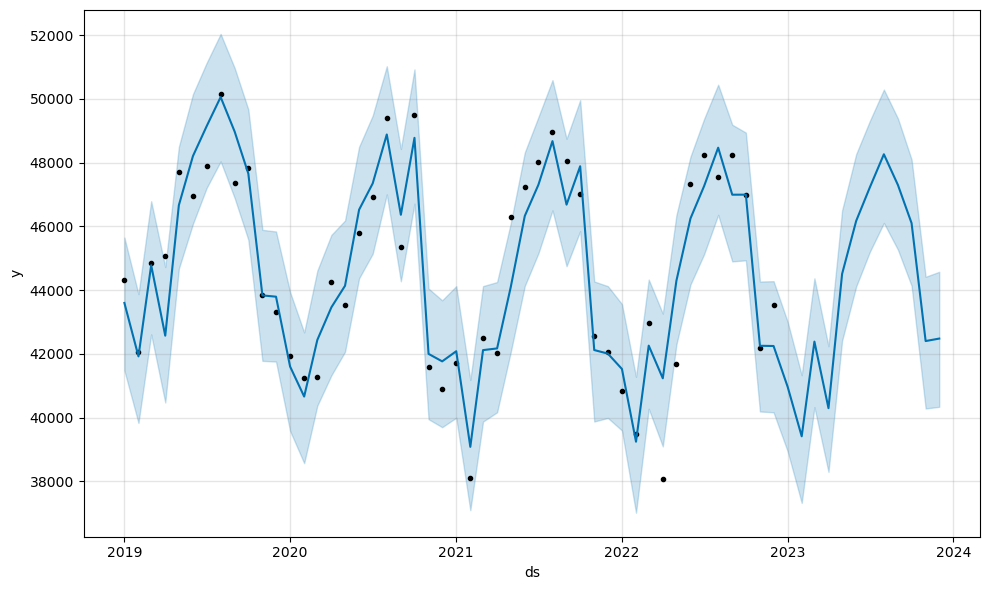

In [11]:
mcom_model = Prophet(seasonality_mode = 'additive', interval_width=0.95)
mcom_model.fit(tr_mcom)
mcom_future = mcom_model.make_future_dataframe(periods = 12, freq = 'MS')
mcom_fcst = mcom_model.predict(mcom_future)
fig = mcom_model.plot(mcom_fcst)
plt.show()

In [12]:
mcom_true = tst_mcom['y'].tolist()
mcom_pred = mcom_fcst['yhat'][-12:].tolist()

mcom_eval = RegressionMetric(mcom_true, mcom_pred)
mcom_rlist = []

for metric in list_metrics:
    mcom_rlist.append(mcom_eval.get_metric_by_name(metric))

print(mcom_rlist)

[{'MSE': 4711876.996205653}, {'MAE': 1504.3950066090772}, {'MedAE': 829.4223854747834}, {'MAPE': 0.03325699877542742}, {'RMSE': 2170.685835445943}, {'R2': 0.12560375925452338}, {'MASE': 0.607145034953766}, {'SMAPE': 0.017105763476543235}]


19:25:08 - cmdstanpy - INFO - Chain [1] start processing
19:25:08 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


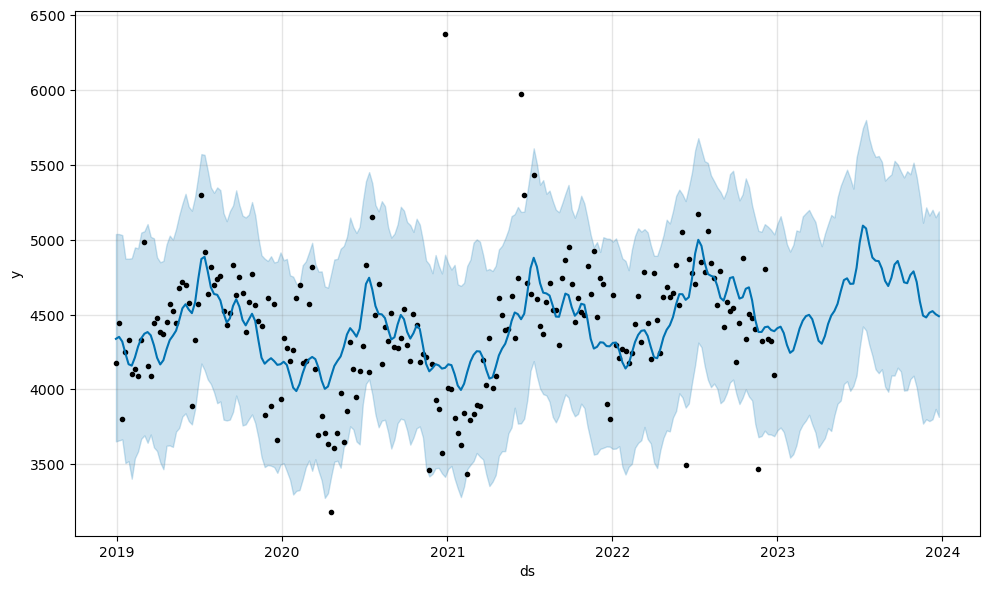

In [14]:
alxw_model = Prophet(seasonality_mode = 'additive', interval_width=0.95)
alxw_model.fit(tr_alxw)
alxw_future = alxw_model.make_future_dataframe(periods = 52, freq = 'W')
alxw_fcst = alxw_model.predict(alxw_future)
fig = alxw_model.plot(alxw_fcst)
plt.show()

In [15]:
alxw_true = tst_alxw['y'].tolist()
alxw_pred = alxw_fcst['yhat'][-52:].tolist()

alxw_eval = RegressionMetric(alxw_true, alxw_pred)
alxw_rlist = []

for metric in list_metrics:
    alxw_rlist.append(alxw_eval.get_metric_by_name(metric))

print(alxw_rlist)

[{'MSE': 151050.30947900983}, {'MAE': 310.6043203534983}, {'MedAE': 264.9651212731992}, {'MAPE': 0.06379153337735506}, {'RMSE': 388.65191300057927}, {'R2': 0.1848682258574864}, {'MASE': 1.3372294730734773}, {'SMAPE': 0.032740585800929964}]


19:34:59 - cmdstanpy - INFO - Chain [1] start processing
19:35:00 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


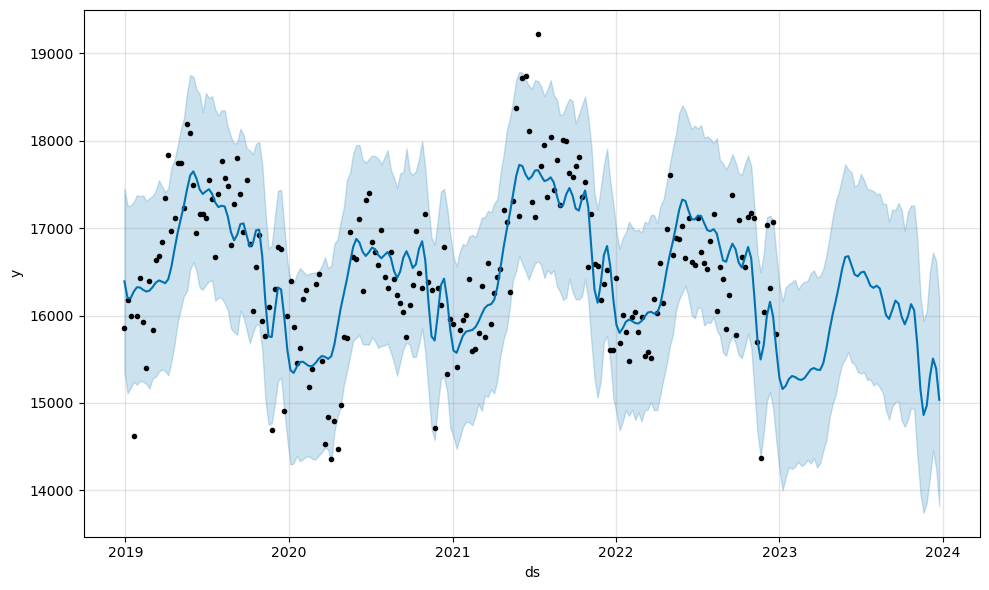

In [16]:
gcow_model = Prophet(seasonality_mode = 'additive', interval_width=0.95)
gcow_model.fit(tr_gcow)
gcow_future = gcow_model.make_future_dataframe(periods = 52, freq = 'W')
gcow_fcst = gcow_model.predict(gcow_future)
fig = gcow_model.plot(gcow_fcst)
plt.show()

In [17]:
gcow_true = tst_gcow['y'].tolist()
gcow_pred = gcow_fcst['yhat'][-52:].tolist()

gcow_eval = RegressionMetric(gcow_true, gcow_pred)
gcow_rlist = []

for metric in list_metrics:
    gcow_rlist.append(gcow_eval.get_metric_by_name(metric))

print(gcow_rlist)

[{'MSE': 1231922.7852478463}, {'MAE': 985.8812781961601}, {'MedAE': 968.3806660043074}, {'MAPE': 0.0580989481862331}, {'RMSE': 1109.92017066447}, {'R2': -1.060241378475736}, {'MASE': 1.922457183910842}, {'SMAPE': 0.03011852651932166}]


19:39:33 - cmdstanpy - INFO - Chain [1] start processing
19:39:33 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


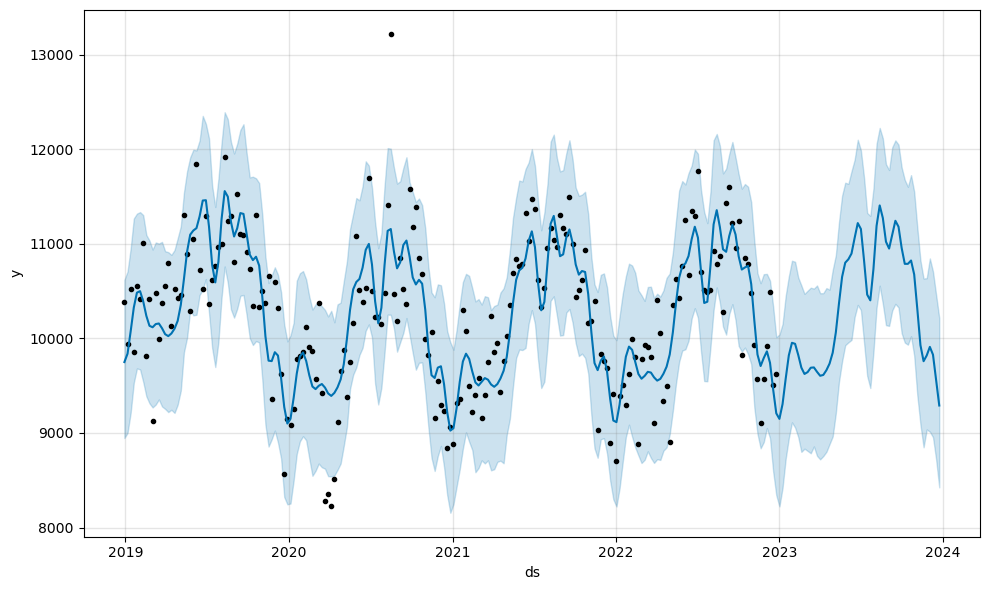

In [18]:
mcow_model = Prophet(seasonality_mode = 'additive', interval_width=0.95)
mcow_model.fit(tr_mcow)
mcow_future = mcow_model.make_future_dataframe(periods = 52, freq = 'W')
mcow_fcst = mcow_model.predict(mcow_future)
fig = mcow_model.plot(mcow_fcst)
plt.show()

In [19]:
mcow_true = tst_mcow['y'].tolist()
mcow_pred = mcow_fcst['yhat'][-52:].tolist()

mcow_eval = RegressionMetric(mcow_true, mcow_pred)
mcow_rlist = []

for metric in list_metrics:
    mcow_rlist.append(mcow_eval.get_metric_by_name(metric))

print(mcow_rlist)

[{'MSE': 526090.5060331746}, {'MAE': 578.2203792126513}, {'MedAE': 522.6906940460303}, {'MAPE': 0.057813051385877626}, {'RMSE': 725.3209675951568}, {'R2': 0.10531047327690968}, {'MASE': 1.2697743429144512}, {'SMAPE': 0.028659260949619805}]


19:48:05 - cmdstanpy - INFO - Chain [1] start processing
19:48:06 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


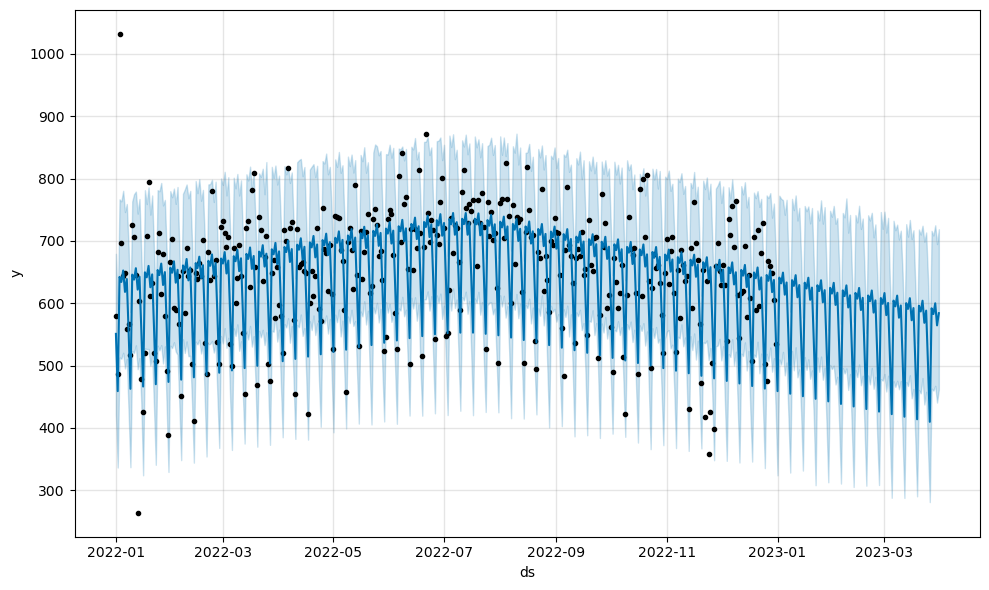

In [20]:
alxd_model = Prophet(seasonality_mode = 'additive', interval_width=0.95)
alxd_model.fit(tr_alxd)
alxd_future = alxd_model.make_future_dataframe(periods = 90)
alxd_fcst = alxd_model.predict(alxd_future)
fig = alxd_model.plot(alxd_fcst)
plt.show()

In [25]:
alxd_true = tst_alxd['y'].tolist()
alxd_pred = alxd_fcst['yhat'][-90:].tolist()

alxd_eval = RegressionMetric(alxd_true, alxd_pred)
alxd_rlist = []

for metric in list_metrics:
    alxd_rlist.append(alxd_eval.get_metric_by_name(metric))

print(alxd_rlist)

[{'MSE': 11617.972884762476}, {'MAE': 89.64002804139058}, {'MedAE': 72.80615311384133}, {'MAPE': 0.14621780566926676}, {'RMSE': 107.7867008715012}, {'R2': -0.08661926624035532}, {'MASE': 0.845750291072168}, {'SMAPE': 0.07456915820525274}]


20:31:22 - cmdstanpy - INFO - Chain [1] start processing
20:31:23 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


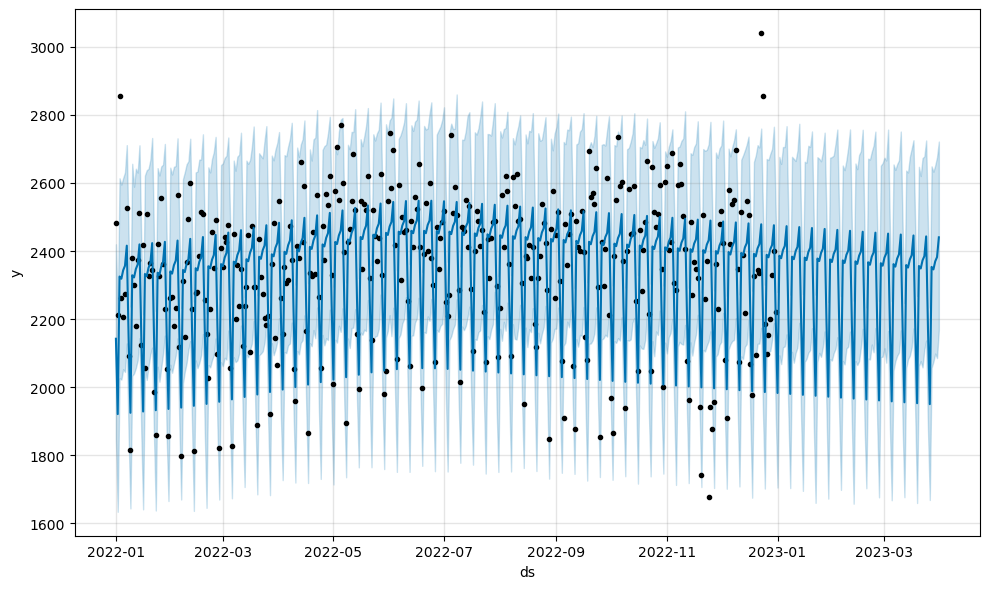

In [27]:
gcod_model = Prophet(seasonality_mode = 'additive', interval_width=0.95)
gcod_model.fit(tr_gcod)
gcod_future = gcod_model.make_future_dataframe(periods = 90)
gcod_fcst = gcod_model.predict(gcod_future)
fig = gcod_model.plot(gcod_fcst)
plt.show()

In [28]:
gcod_true = tst_gcod['y'].tolist()
gcod_pred = gcod_fcst['yhat'][-90:].tolist()

gcod_eval = RegressionMetric(gcod_true, gcod_pred)
gcod_rlist = []

for metric in list_metrics:
    gcod_rlist.append(gcod_eval.get_metric_by_name(metric))

print(gcod_rlist)

[{'MSE': 24357.304820552323}, {'MAE': 128.5322125755262}, {'MedAE': 128.6483104514607}, {'MAPE': 0.05408445316372339}, {'RMSE': 156.06826974293116}, {'R2': 0.4630063050054296}, {'MASE': 0.6121564145781468}, {'SMAPE': 0.027562726815485203}]


20:35:46 - cmdstanpy - INFO - Chain [1] start processing
20:35:46 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


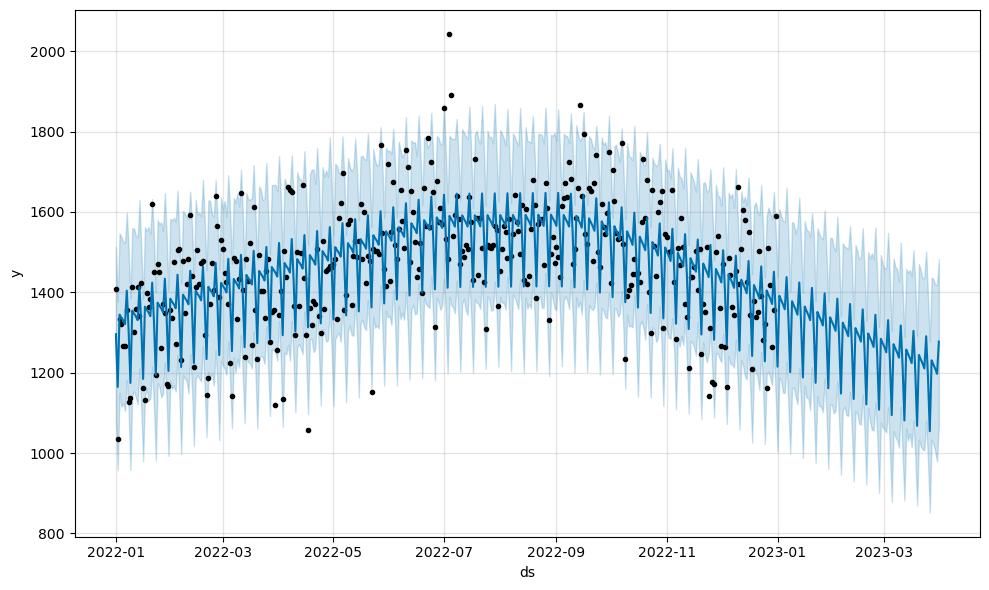

In [29]:
mcod_model = Prophet(seasonality_mode = 'additive', interval_width=0.95)
mcod_model.fit(tr_mcod)
mcod_future = mcod_model.make_future_dataframe(periods = 90)
mcod_fcst = mcod_model.predict(mcod_future)
fig = mcod_model.plot(mcod_fcst)
plt.show()

In [30]:
mcod_true = tst_mcod['y'].tolist()
mcod_pred = mcod_fcst['yhat'][-90:].tolist()

mcod_eval = RegressionMetric(mcod_true, mcod_pred)
mcod_rlist = []

for metric in list_metrics:
    mcod_rlist.append(mcod_eval.get_metric_by_name(metric))

print(mcod_rlist)

[{'MSE': 61971.79932269591}, {'MAE': 187.76436563129877}, {'MedAE': 148.78503550903258}, {'MAPE': 0.12021744341634659}, {'RMSE': 248.94135719621983}, {'R2': -0.7778075570026042}, {'MASE': 1.2050063845677523}, {'SMAPE': 0.06608208498974885}]


20:44:48 - cmdstanpy - INFO - Chain [1] start processing
20:44:49 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


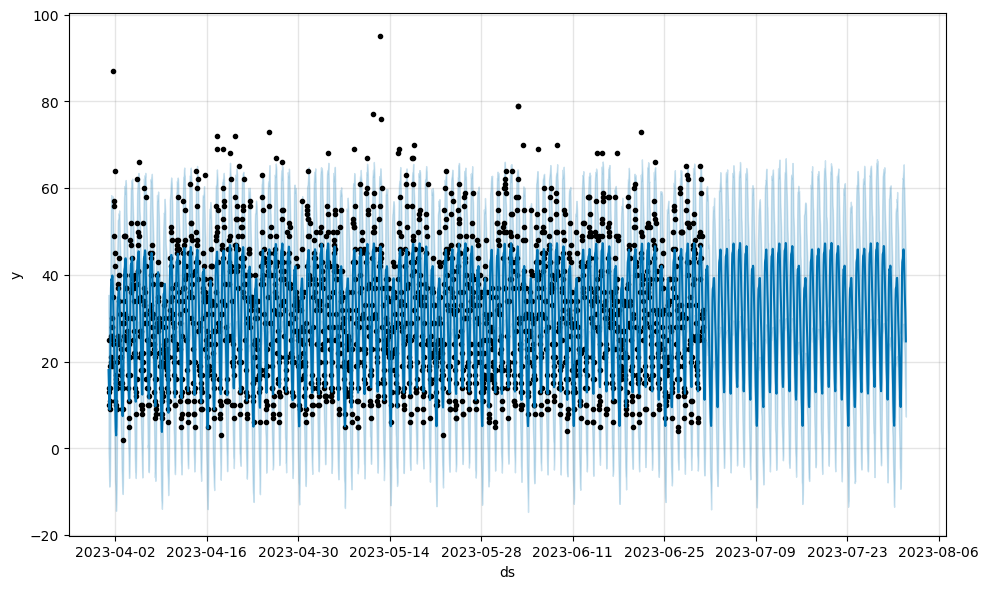

In [31]:
alxh_model = Prophet(seasonality_mode = 'additive', interval_width=0.95)
alxh_model.fit(tr_alxh)
alxh_future = alxh_model.make_future_dataframe(periods = 31 * 24, freq='h')
alxh_fcst = alxh_model.predict(alxh_future)
fig = alxh_model.plot(alxh_fcst)
plt.show()

In [32]:
alxh_true = tst_alxh['y'].tolist()
alxh_pred = alxh_fcst['yhat'][-744:].tolist()

alxh_eval = RegressionMetric(alxh_true, alxh_pred)
alxh_rlist = []

for metric in list_metrics:
    alxh_rlist.append(alxh_eval.get_metric_by_name(metric))

print(alxh_rlist)

[{'MSE': 92.48250105371507}, {'MAE': 7.29825725122722}, {'MedAE': 5.810532063827981}, {'MAPE': 0.3152441485075176}, {'RMSE': 9.616782260908014}, {'R2': 0.5997296984051588}, {'MASE': 0.8636096731425106}, {'SMAPE': 0.13343061373050052}]


20:56:01 - cmdstanpy - INFO - Chain [1] start processing
20:56:01 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


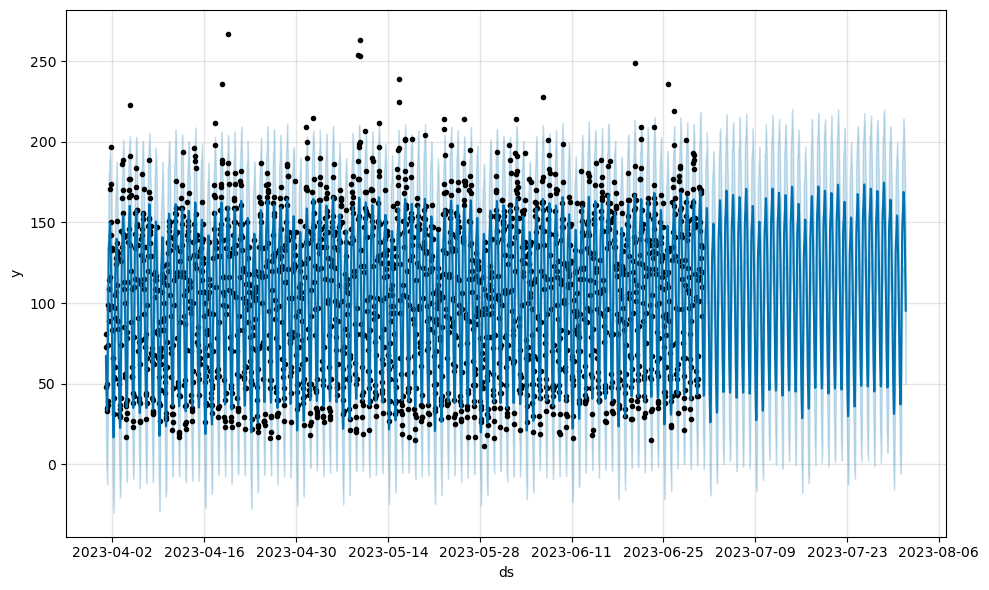

In [33]:
gcoh_model = Prophet(seasonality_mode = 'additive', interval_width=0.95)
gcoh_model.fit(tr_gcoh)
gcoh_future = gcoh_model.make_future_dataframe(periods = 31 * 24, freq='h')
gcoh_fcst = gcoh_model.predict(gcoh_future)
fig = gcoh_model.plot(gcoh_fcst)
plt.show()

In [35]:
gcoh_true = tst_gcoh['y'].tolist()
gcoh_pred = gcoh_fcst['yhat'][-744:].tolist()

gcoh_eval = RegressionMetric(gcoh_true, gcoh_pred)
gcoh_rlist = []

for metric in list_metrics:
    gcoh_rlist.append(gcoh_eval.get_metric_by_name(metric))

print(gcoh_rlist)

[{'MSE': 538.3770608271379}, {'MAE': 18.116994397579283}, {'MedAE': 15.311824367184869}, {'MAPE': 0.23490804663052384}, {'RMSE': 23.202953709110783}, {'R2': 0.7593320182507097}, {'MASE': 0.9515039822860965}, {'SMAPE': 0.10055811682942925}]


21:02:38 - cmdstanpy - INFO - Chain [1] start processing
21:02:38 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\trdun\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


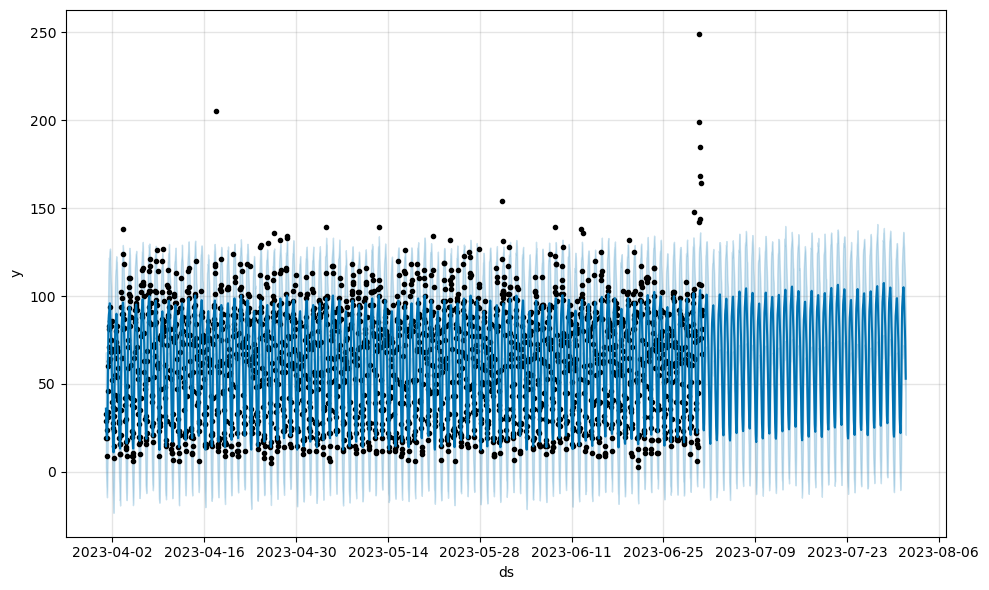

In [36]:
mcoh_model = Prophet(seasonality_mode = 'additive', interval_width=0.95)
mcoh_model.fit(tr_mcoh)
mcoh_future = mcoh_model.make_future_dataframe(periods = 31 * 24, freq='h')
mcoh_fcst = mcoh_model.predict(mcoh_future)
fig = mcoh_model.plot(mcoh_fcst)
plt.show()

In [37]:
mcoh_true = tst_mcoh['y'].tolist()
mcoh_pred = mcoh_fcst['yhat'][-744:].tolist()

mcoh_eval = RegressionMetric(mcoh_true, mcoh_pred)
mcoh_rlist = []

for metric in list_metrics:
    mcoh_rlist.append(mcoh_eval.get_metric_by_name(metric))

print(mcoh_rlist)

[{'MSE': 340.0104971412095}, {'MAE': 13.256887812071966}, {'MedAE': 10.30623942090618}, {'MAPE': 0.28183554680081513}, {'RMSE': 18.439373556094836}, {'R2': 0.6633150477475825}, {'MASE': 0.9779455564306464}, {'SMAPE': 0.11850928936433794}]
